# [LAB 06_데이터 시각화] 
# 1. Line Plot

## #00. 시각화 개요

### 1. 데이터의 패턴과 의미를 '눈으로 보게' 만드는 과정

In [ ]:
# 숫자 표 형태로는 보이지 않던 경향, 변화, 차이, 관계를 
# 그래픽으로 변환해 직관적으로 이해하게 만드는 과정

# 너무 화려하거나 복잡하면 오히려 데이터의 이해를 어렵게 함

### 2. 시각화의 목적

In [ ]:
# - 분석: 데이터 속 패턴, 이상피, 분포, 상관관계 파악
# - 설명: 분석 결과를 쉽게 전달
# - 의사결정: 인사이트를 바탕으로 더 나은 선택을 가능하게 함
#            (정책관련 성격이 큼)
#-----------------------------------------------------
# 강조하고 싶은 부분이 부각되게끔 스토리텔링 하는 것
# by: x축, y축 구간, 범위 설정 / 그래프 가로세로 크기 설정

### 3. 시각화 구분

| 분류 | 설명 | 대표목적 | 주로 사용하는 seaborn 함수 |
| ---- | ---- | ------- | ------------------------ |
| 시계열 (Time series) | 시간의 흐름에 따라 값이 어떻게 변하는지 표현 | 추세, 변동성, 계절성 분석| lineplot() |
| 분포(Distribution) | 하나의 변수 값이 어떻게 퍼져있는지 표현 | 패턴, 이상치, 형태(정규성) 확인 | boxplot(), histplot(), kdepplot(), violinplot(), ecdfplot() |
| 범주형(Categorical) | 그룹 간 차이를 비교하거나 범주의 빈도 확인 | 집단비교, 비율분석| barplot(), countplot(), violinplot(), swarmplot() |
| 관계(Relationship) | 두 변수(연속형, 범주형)의 관계를 표현 | 상관, 패턴, 경향성 파악| scatterplot(), regplot(), lineplot(), jointplot() |
| 행렬(Matrix) | 여러 변수의 조합을 표 형태로 표현하거나 상관을 열 지도 형태로 시각화 | 변수 상관성, 패턴구조 파악 | heatmap(), clustermap()|
| 다변량(Multivariate) | 3개 이상의 변수 간 관계를 한번에 확인 | 고차원 구조 탐색, 분포-관계 종합 분석 | pairplot(), jointplot(), FacetGridplot(), catplot(), relplot() |

##### 계절성: 일정 시간 동안 비슷한 패턴이 유지되는 것

### 4. 시각화에 필요한 주요 객체

##### - 기본형: matplotlib만 사용
##### - 응용형태: matplotlib + pandas(DataFrame)
##### - 확장형: matplotlib + seaborn
##### (↑ 세 가지 방법 다 코드 진행 패턴이 다 다름)
| 개념 | 비유 | 이유 |
| ---- | ---- | ---- |
| Figure | 큰 캔버스, 화판 | 전체 그림을 담는 공간 |
| Axes | 개별 작업 구역 (스케치북 페이지) | 그래프가 실제로 그려지는 공간 |
| matplotlib 기본함수 | 기본 붓, 연필| 전부 직접 컨트롤, 자유도 높음 |
| seaborn | 고급 붓, 전문 도구 세트 | 기본 스타일링, 색감, 레이아웃 자동화 |
##### qdis: 지도시각화에 최적화 된 실무 프로그램

## #01. 준비작업

### 1. 라이브러리 참조
###### matplotlib, seaborn 패키지가 설치되야함

In [2]:
from hossam import load_data
from matplotlib import pyplot as plt 
# ↑: 캔버스(figure) 생성, 기본 그래픽 함수 제공
from matplotlib import font_manager as fm 
# ↑: 글꼴을 시스템에 등록용
import seaborn as sb    
# ↑: 고급 그래픽 기능 제공

### 2. 시스템 전역 설정
###### 아래의 코드는 컴퓨터 당 1회만 수행하면 됨

In [14]:
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"
#"./NotoSansKR-Regular.ttf"
    # ↑: 한글 지원하는 폰트파일의 경로
fm.fontManager.addfont(font_path)      
    # ↑: 폰트 글꼴 시스템에 등록
font_prop = fm.FontProperties(fname = font_path)
    # ↑: 폰의 속성 읽어오기
font_name = font_prop.get_name()
    # ↑: 읽어온 속성에서 폰트이름만 추출
    # why? 시스템이 인식하는 폰트 이름은 다 영문으로 
    # 되어있기 때문에 폰트 이름 확인은 필수임
font_name # 글꼴 이름 확인

'Noto Sans KR'

### 3. 그래프 설정
###### 글꼴 이름을 알려주는건 주피터 파일 당 한번씩 수행하면됨
###### 이와 같은 형식의 코드가 다시 실행되기 전 까지 현재 소스파일의 모든 그래프에 전역으로 적용되는 설정
###### theme 종류: whitegrid, darkgrid, white(기본값), dark

In [ ]:
my_dpi = 120                   # 이미지 선명도 (비율값)
my_font_name = 'Noto Sans KR'  # 시스템에 등록된 글꼴 이름
my_theme = 'dark'              # 그림 스타일 지전

sb.set_theme(style = my_theme) # seaborn 스타일 (화풍설정)

plt.rcParams['font.family'] = my_font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 16          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

## #02. 그래프 기본 코드 구성하기

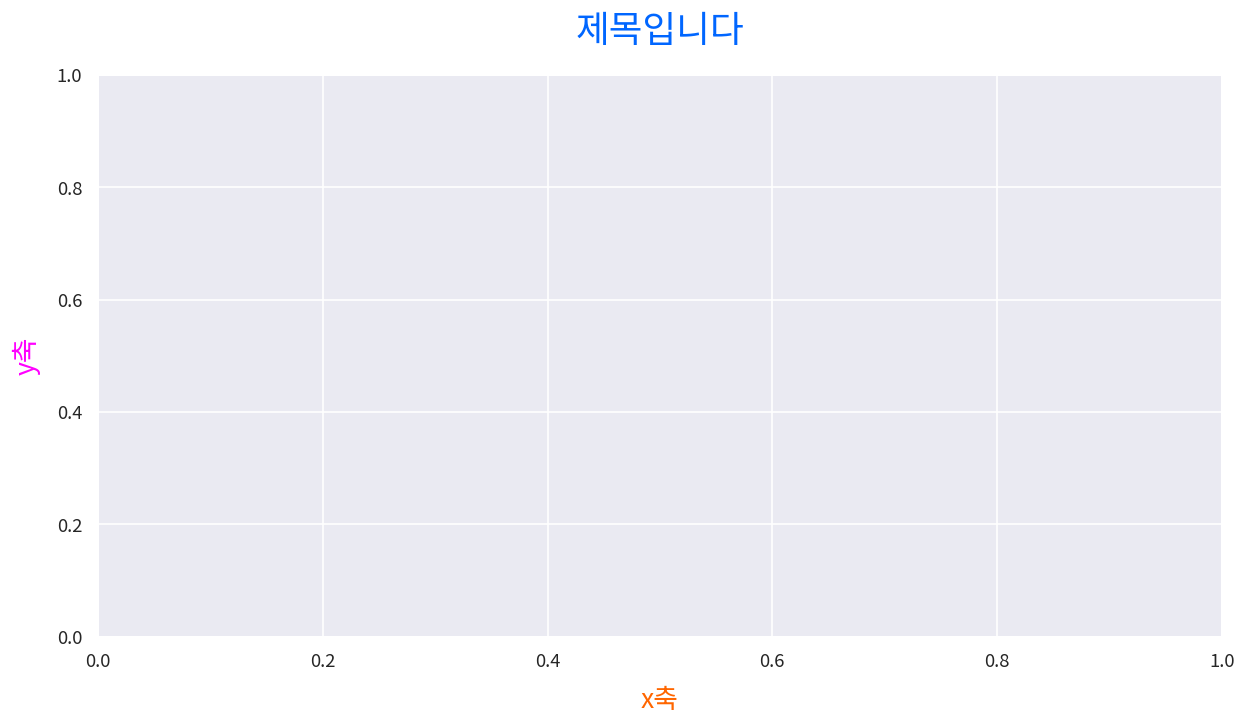

In [20]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280     # 그래프 가로크기
height_px = 760     # 그래프 세로크기
rows = 1            # 도화지의 행 수
cols = 1            # 도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프의 도화지 상태 확인용 테스트 코드
#print(ax)

# 2) 그래프 그리기: seaborn 사용
# ...

# 3) 그래프 꾸미기: 도화지(ax)에 직접 적용
    # color: 글자 색상 (기본값: black)
    # fontsize: 글자 크기 (기본값: 위에서 정한 plt.rcParams['font_size] 설정)
    # pad, labelpad: 그래프와 글자 간 간격
    # fontweight: 글자 굵기 (100 ~ 1000 사이 100단위 값) 
        # 글꼴이 지원하는 경우만 적용됨
ax.set_title(
    "제목입니다", color = "#0066ff", 
    fontsize = 22, fontweight = 1000, pad = 20
)
ax.set_xlabel("x축", color = "#ff6600", fontsize = 16, labelpad = 10)
ax.set_ylabel("y축", color = "#ff00ff", fontsize = 16, labelpad = 10)

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료
#-------------------------------------------------------
# ↑: 코드로 그림 그릴 때 마다 2~4는 적기 (3번은 생략 가능)
# ↑: 출력에서 저장 안할거면 다운로드 옵션 줄 지워도 됨

## #03. Line Plot (선그래프)
###### 선그래프는 주로 변수의 시간 당 흐름 OR 순서 등에 따라 어떻게 변화하는지 보여주기 위해 사용됨

### 1. 기본 그리기
###### 그래프에 표시될 데이터를 리스트 등의 연속형 자료 형태로 지정
###### x축: 인덱스, y축: 값

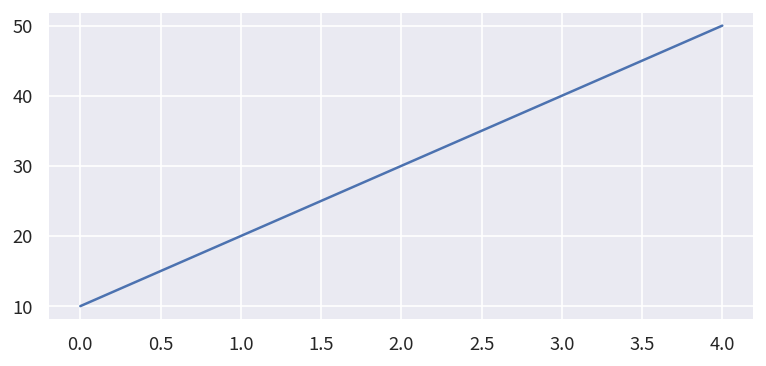

In [19]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 800      
height_px = 400     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot([10, 20, 30, 40, 50])

# 3) 그래프 꾸미기: 여기선 생략할거임

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 2. x, y축 및 선 모양 지정법
###### x축과 y축 모두 리스트 지정

| 파라미터 이름 | 파라미터 약자 | 의미 |
| ------------ | ------------ | ---- |
| color | c | 선 색깔 |
| linestyle | ls | 선 스타일 |
| linewidth | lw | 선 굵기 |
| marker |  | 마커 종류 |
| markersize | ms | 마커 크기 |
| markerfacecolor | mfc | 마커 내부 색깔 |
| markeredgecolor | mec | 마커 선 색깔 |
| markeredgewidth | mew | 마커 선 굵기 |

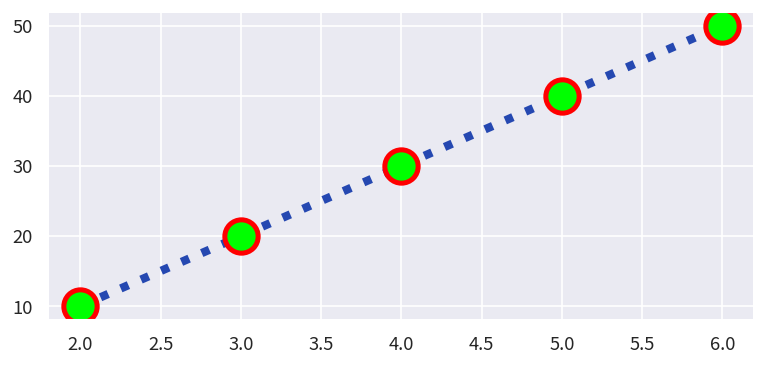

In [ ]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 800      
height_px = 400     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(x = [2, 3, 4, 5, 6], y = [10, 20, 30, 40, 50],
            c = "#2548b1", linestyle = ":", linewidth = 5,
            marker = "o", markersize = 20, markerfacecolor = "#00ff00",
            markeredgecolor = "#ff0000", markeredgewidth = 3)

# 3) 그래프 꾸미기: 여기선 생략할거임

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료

[1] 선 스타일
| 선 스타일 문자열 | 뜻 |
| --------------- | -- |
| - | 실선(solid) |
| -- | 대시선(dashed) |
| : | 점선(dotted) |
| -.| 대시점선(dash-dot) |

[2] 마커
- 정의: 데이터 위치를 나타내는 기호
- 종류 ↓
  
| 마커 문자열 | 뜻 |
| ---------- | -- |
| . | point marker |
| , | pixel marker |
| o | circle marker |
| v | triangle_down marker |
| ^ | triangle_up marker |
| < | triangle_left marker |
| > | triangle_right marker |
| 1 | tri_down marker |
| 2 | tri_up marker |
| 3 | tri_left marker |
| 4 | tri_right marker |
| s | square marker |
| p | pentagon marker |
| * | star marker |
| h | hexagon1 marker |
| H | hexagon2 marker |
| + | plus marker |
| x | x marker |
| D | diamond marker |
| d | thin_diamond marker |


### 3. 축 범위 설정

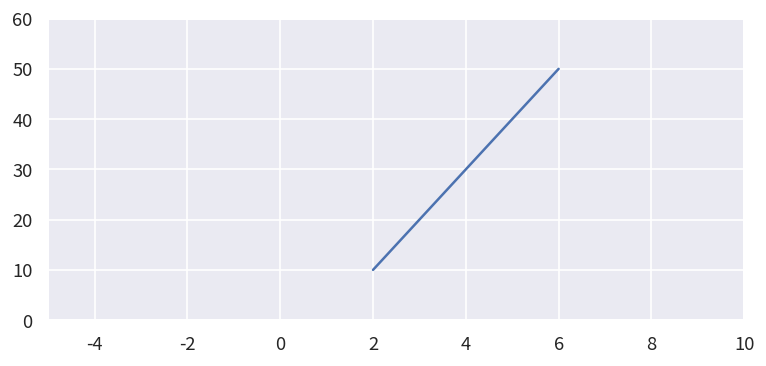

In [25]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 800      
height_px = 400     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(x = [2, 3, 4, 5, 6], y = [10, 20, 30, 40, 50])

# 3) 그래프 꾸미기: 
ax.set_xlim([-5, 10])   # x축 범위
ax.set_ylim([0, 60])    # y축 범위

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료

### 4. 각 축의 표시내용 설정법

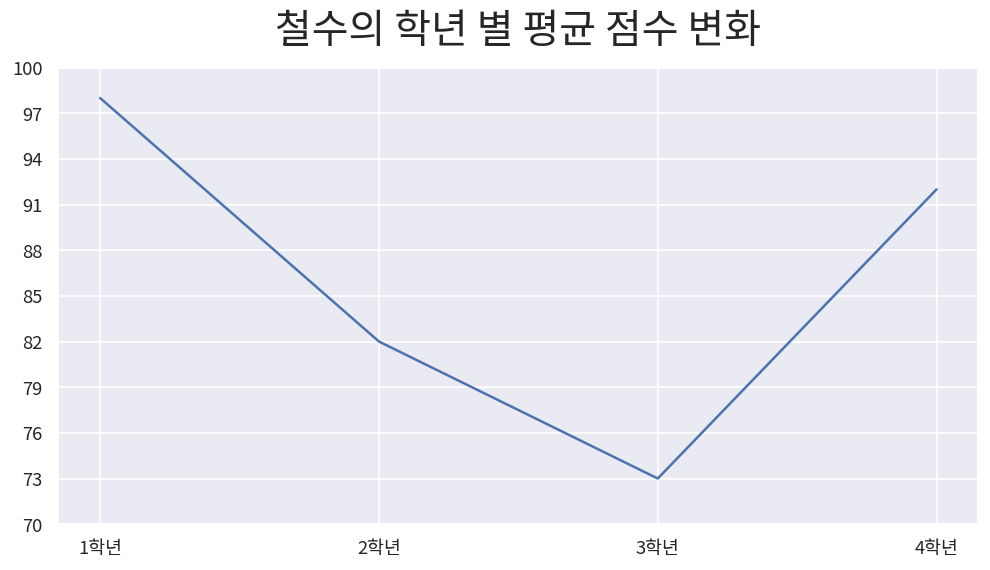

In [27]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1024     
height_px = 604
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(x = [1, 2, 3, 4], y = [98, 82, 73, 92])

# 3) 그래프 꾸미기: 
ax.set_title("철수의 학년 별 평균 점수 변화", pad = 15, fontsize = 24)
ax.set_xticks([1, 2, 3, 4], ['1학년', '2학년', '3학년', '4학년'])
ax.set_yticks(range(70, 101, 3), range(70, 101, 3))

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료

## 04. 다중 선 그래프

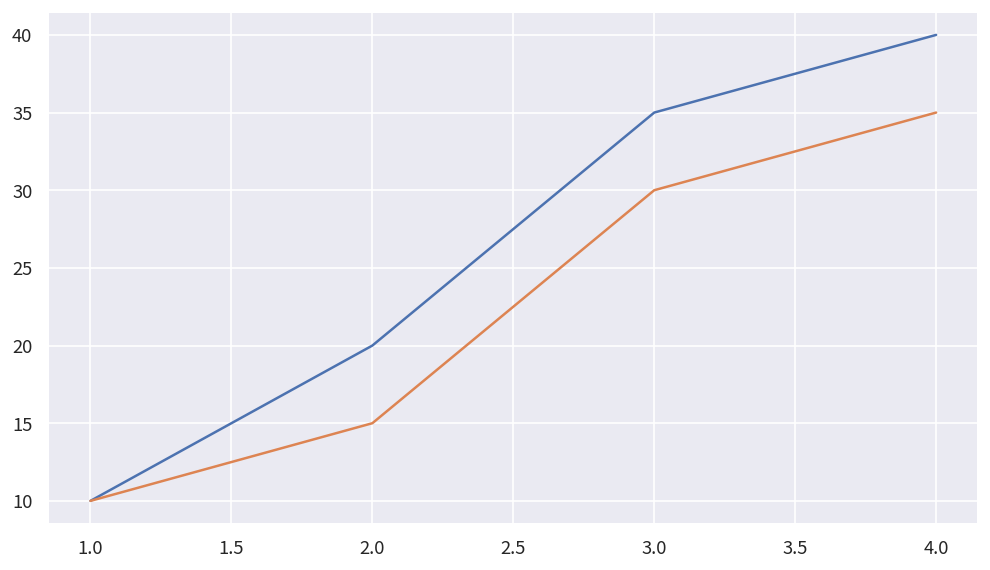

In [29]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1024     
height_px = 604
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(x = [1, 2, 3, 4], y = [10, 20, 35, 40])
sb.lineplot(x = [1, 2, 3, 4], y = [10, 15, 30, 35])

# 3) 그래프 꾸미기: 생략!

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료

## #05. 예제: 교통사고 발생건수 시각화

### 1. 데이터 가져오기

In [32]:
origin = load_data('traffic_acc')
origin

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### 2. 데이터 전처리

In [34]:
df = origin.drop('월', axis=1).groupby('년도').mean()
df

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000
2010,18906.500000,458.750000,29371.500000
2011,18475.916667,435.750000,28449.250000
2012,18638.000000,449.333333,28713.750000
2013,17946.166667,424.333333,27392.583333


### 3. 교통사고 발생자 수 변화

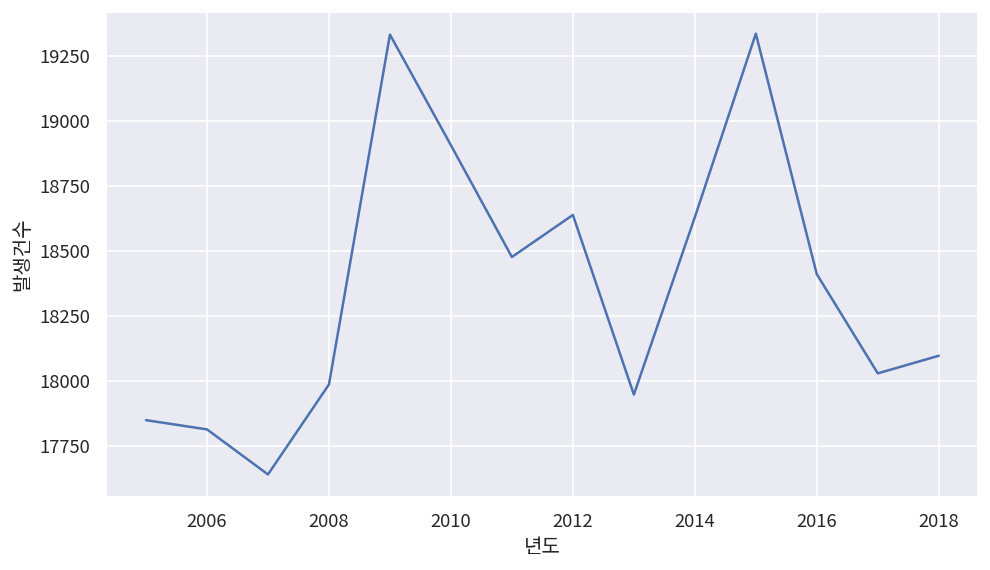

In [36]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1024     
height_px = 604
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(data = df, x = df.index, y = '발생건수')

# 3) 그래프 꾸미기: 생략!

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료